# **Project Title**: Churn prediction in a bank

# **Domain**: Finance 

# **Business Case**: Prediction of customer churn in a bank.

# Data Map

This dataset contains 10000 observations and 12 features and 1 label (Exited).

### **Variables :**

**1. RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**2. CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**3. Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**4. CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**5. Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.
Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**6. Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**7. Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**8. Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**9. NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**10. HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**11. IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**12. EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**13 Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)


# Import the Librairies

In [34]:
#pip install imblearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import ClusterCentroids

# Import the data

In [3]:
data = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Churn_Modelling (1).csv')

# Explore the data from an bird's-eye view

Things we will be looking for:

What the dataset looks like?
What are the data types?
Which columns contain the features of the churn?
Which column contains the feature we will predict? What is the code standing for whether or not the customer left the bank?
Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

In [4]:
# Print the first 5 rows:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Print the last 5 rows:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
# Print the shape
data.shape

(10000, 14)

In [7]:
# Print the columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# We can drop 3 columns that have no impact on the customer decision to leave the bank: 'RowNumber', 'CustomerId' and 'Surname'
data.drop(columns = ['RowNumber', 'CustomerId' ,'Surname'], inplace = True)

In [9]:
# Data types
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### We have 2 columns with categorical data, 'Geography' and 'Gender'. The others are float or integers.

In [10]:
# Describe of our data excluding the categorical data
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### The column 'Exited' contains the feature we will predict.

In [11]:
data['Exited'].value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
# Churn rate
churn_rate = (len(data[data['Exited'] == 1])/len(data))*100
print('Churn rate: ', churn_rate, '%')

Churn rate:  20.369999999999997 %


In [13]:
# Average Age when they leave: 44,7
age_m = data[data['Age'] & data['Exited'] == 1].mean()
age_m

CreditScore           648.251741
Age                    44.743284
Tenure                  4.968159
Balance             91016.585353
NumOfProducts           1.497512
HasCrCard               0.699502
IsActiveMember          0.363184
EstimatedSalary    103070.773333
Exited                  1.000000
dtype: float64

Comments: We have 10000 rows. The data has two classes: 0 and 1 represents whether or not the customer left the bank.

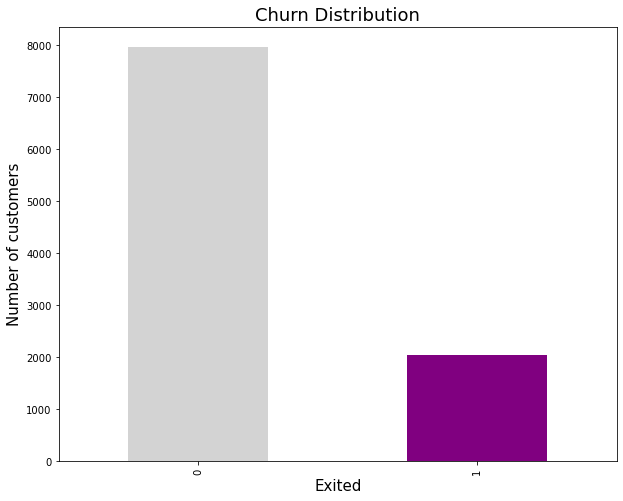

In [15]:
# Plotting the distribution of the classes will give us insights about the imbalance if present
plt.figure(figsize = (10,8))

data['Exited'].value_counts().plot.bar(color = ['lightgrey','purple'])
plt.title('Churn Distribution', fontsize = 18)
plt.xlabel("Exited", fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)


plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Exited_Imbalanced.png')

plt.show()

#### We have 20.37% of our data that is about the Churned customers. There is an imbalance between 0 and 1 at the target feature. We will have to balance it later to use our Machine Learning models.

#### Let's handle categorical data:
* Geography
* Gender

##### Column 'Geography'

In [16]:
# 3 Countries
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

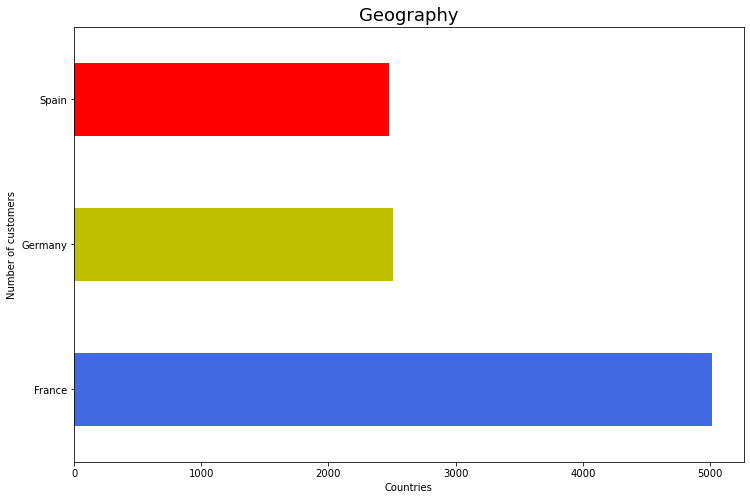

In [17]:
plt.figure(figsize = (12,8))
data['Geography'].value_counts().plot.barh(color = ['royalblue','y','r'])
plt.title('Geography', fontsize = 18)
plt.xlabel("Countries", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)


plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Countries.png')

plt.show()


#### There is more customers in France than in Germany and Spain. Almost 50 % of the customers live in France.

##### Column 'Gender'

In [14]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

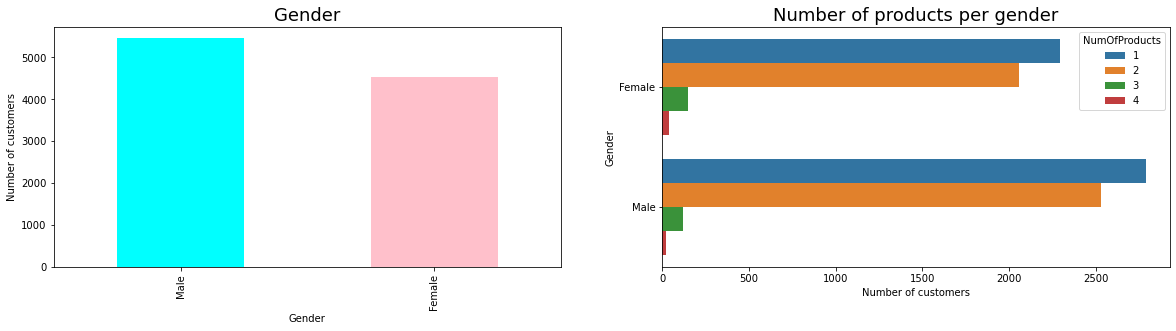

In [15]:
plt.figure(figsize = (20,15))

plt.subplot(321)
data['Gender'].value_counts().plot.bar(color = ['aqua','pink'])
plt.title('Gender', fontsize = 18)
plt.xlabel("Gender", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)


plt.subplot(322)
sns.countplot(y = 'Gender', hue = 'NumOfProducts', data = data)
plt.title('Number of products per gender', fontsize = 18)
plt.xlabel('Number of customers',fontsize = 10)
data['Gender'].value_counts()


plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Gender_Products.png')

plt.show()



#### There is more a little bit more males than females. Males tend to get more products than females.

#### Column 'Age'

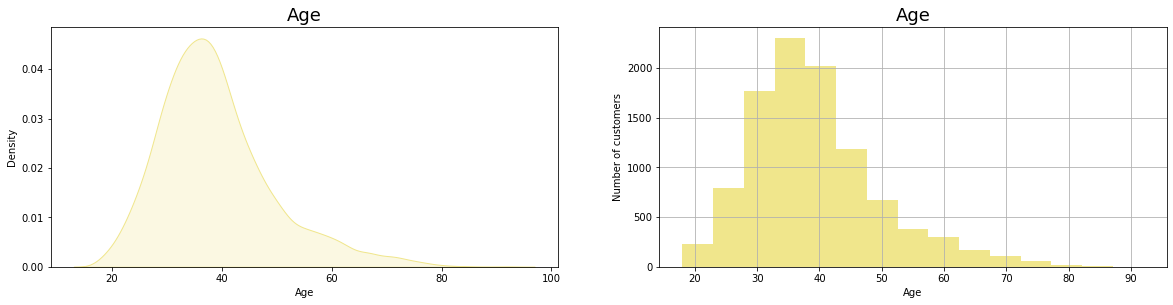

In [18]:
plt.figure(figsize = (20,15))


plt.subplot(321)
sns.kdeplot(data['Age'], color = 'khaki', shade = True)
plt.title('Age', fontsize = 18)
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Density", fontsize = 10)

plt.subplot(322)
data['Age'].hist(bins=15, color = 'khaki')
plt.title('Age', fontsize = 18)
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_Distribution_Age.png')

plt.show()


#### Column 'CreditScore'

<function matplotlib.pyplot.show(close=None, block=None)>

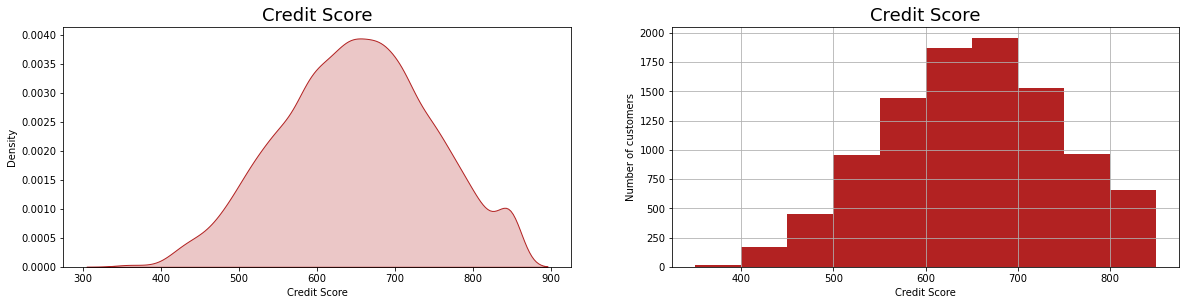

In [19]:
plt.figure(figsize = (20,15))

plt.subplot(321)
sns.kdeplot(data['CreditScore'], color = 'firebrick', shade = True)
plt.title('Credit Score', fontsize = 18)
plt.xlabel("Credit Score",  fontsize = 10)
plt.ylabel("Density", fontsize = 10)


plt.subplot(322)
data['CreditScore'].hist(color = 'firebrick')
plt.title('Credit Score', fontsize = 18)
plt.xlabel("Credit Score", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)
plt.xlabel("Credit Score");


plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\EDA_CreditScore.png')

plt.show


#### Column  'HasCrCard' and 'IsActiveMember'

In [20]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [21]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

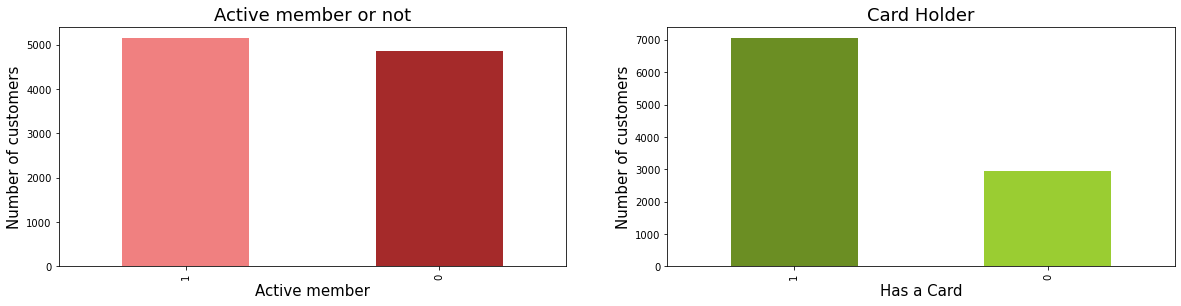

In [22]:
plt.figure(figsize = (20,15))


plt.subplot(321)
data['IsActiveMember'].value_counts().plot.bar(color = ['lightcoral','brown'])
plt.title('Active member or not', fontsize = 18)
plt.xlabel("Active member", fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)

plt.subplot(322)
data['HasCrCard'].value_counts().plot.bar(color = ['olivedrab','yellowgreen'])
plt.title('Card Holder', fontsize = 18)
plt.xlabel("Has a Card", fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\HasCrCard_IsActiveMember.png')

plt.show()

#### Columns 'Balance' and  'EstimatedSalary'

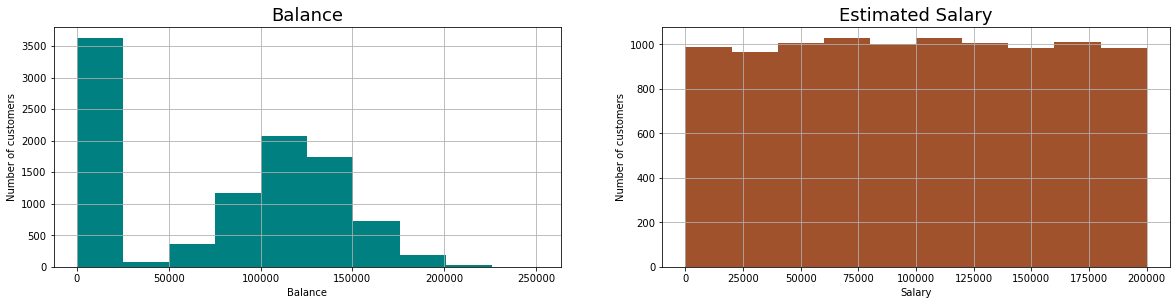

In [23]:
plt.figure(figsize = (20,15))

plt.subplot(321)
data['Balance'].hist(color = 'teal')
plt.title('Balance', fontsize = 18)
plt.xlabel("Balance", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)


plt.subplot(322)
data['EstimatedSalary'].hist(color = 'sienna')
plt.title('Estimated Salary', fontsize = 18)
plt.xlabel("Salary", fontsize = 10)
plt.ylabel("Number of customers", fontsize = 10)

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Balance_EstimatedSalary.png')

plt.show()


#### Relations with 3 features: 'Tenure', 'Balance', ''EstimatedSalary' and the label.

C:\Users\Ingrid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ingrid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ingrid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

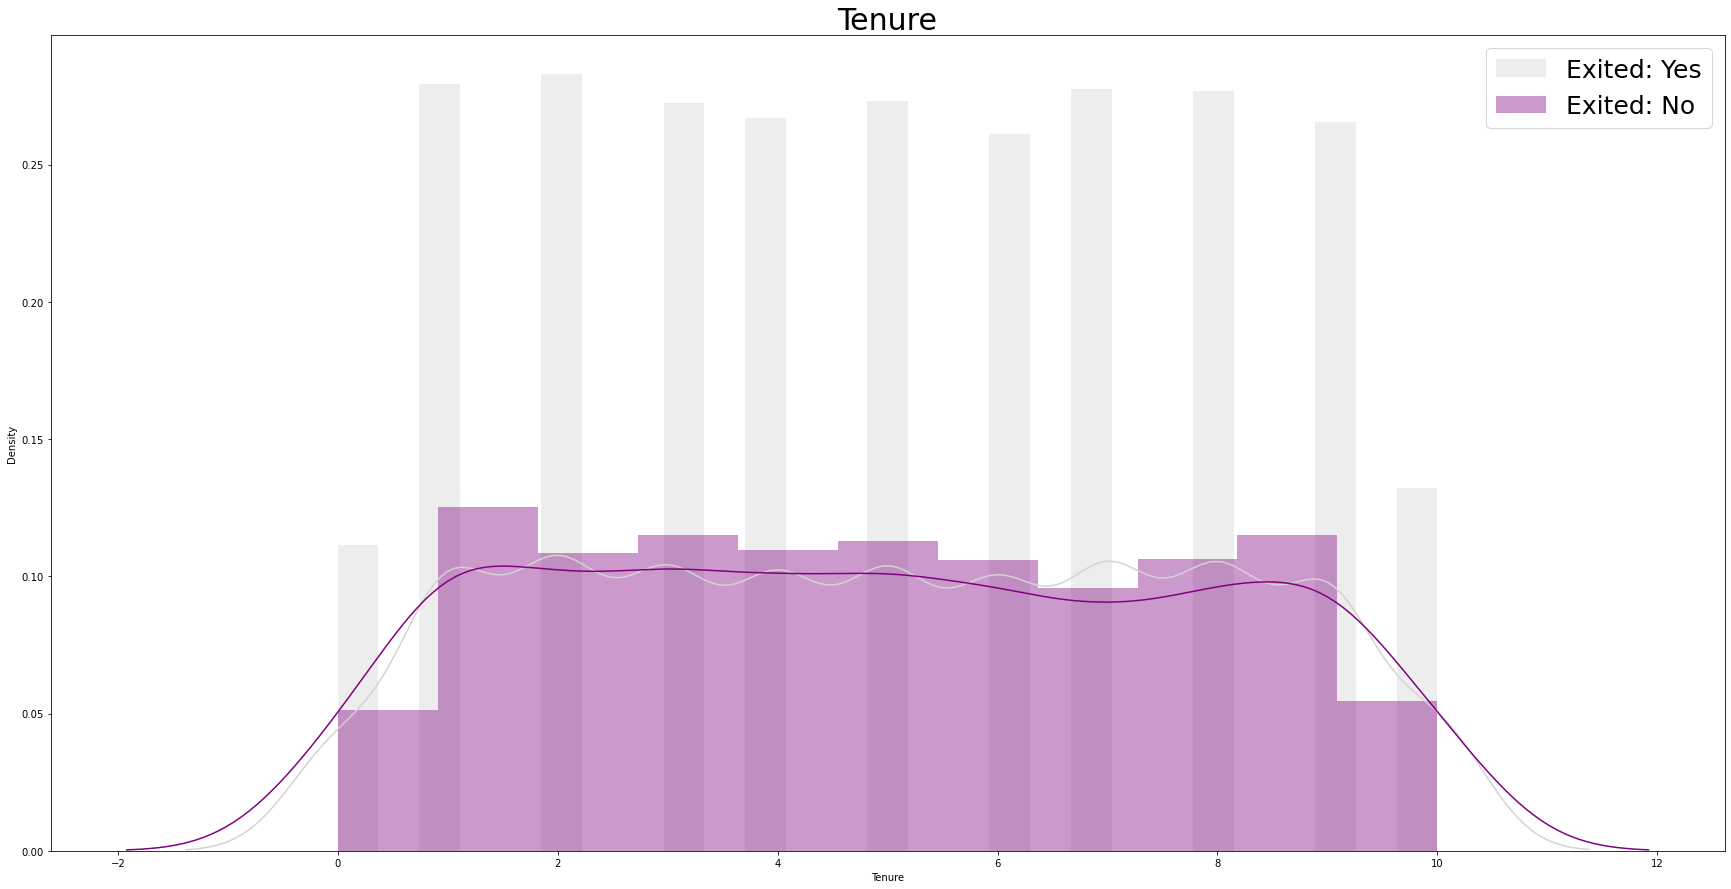

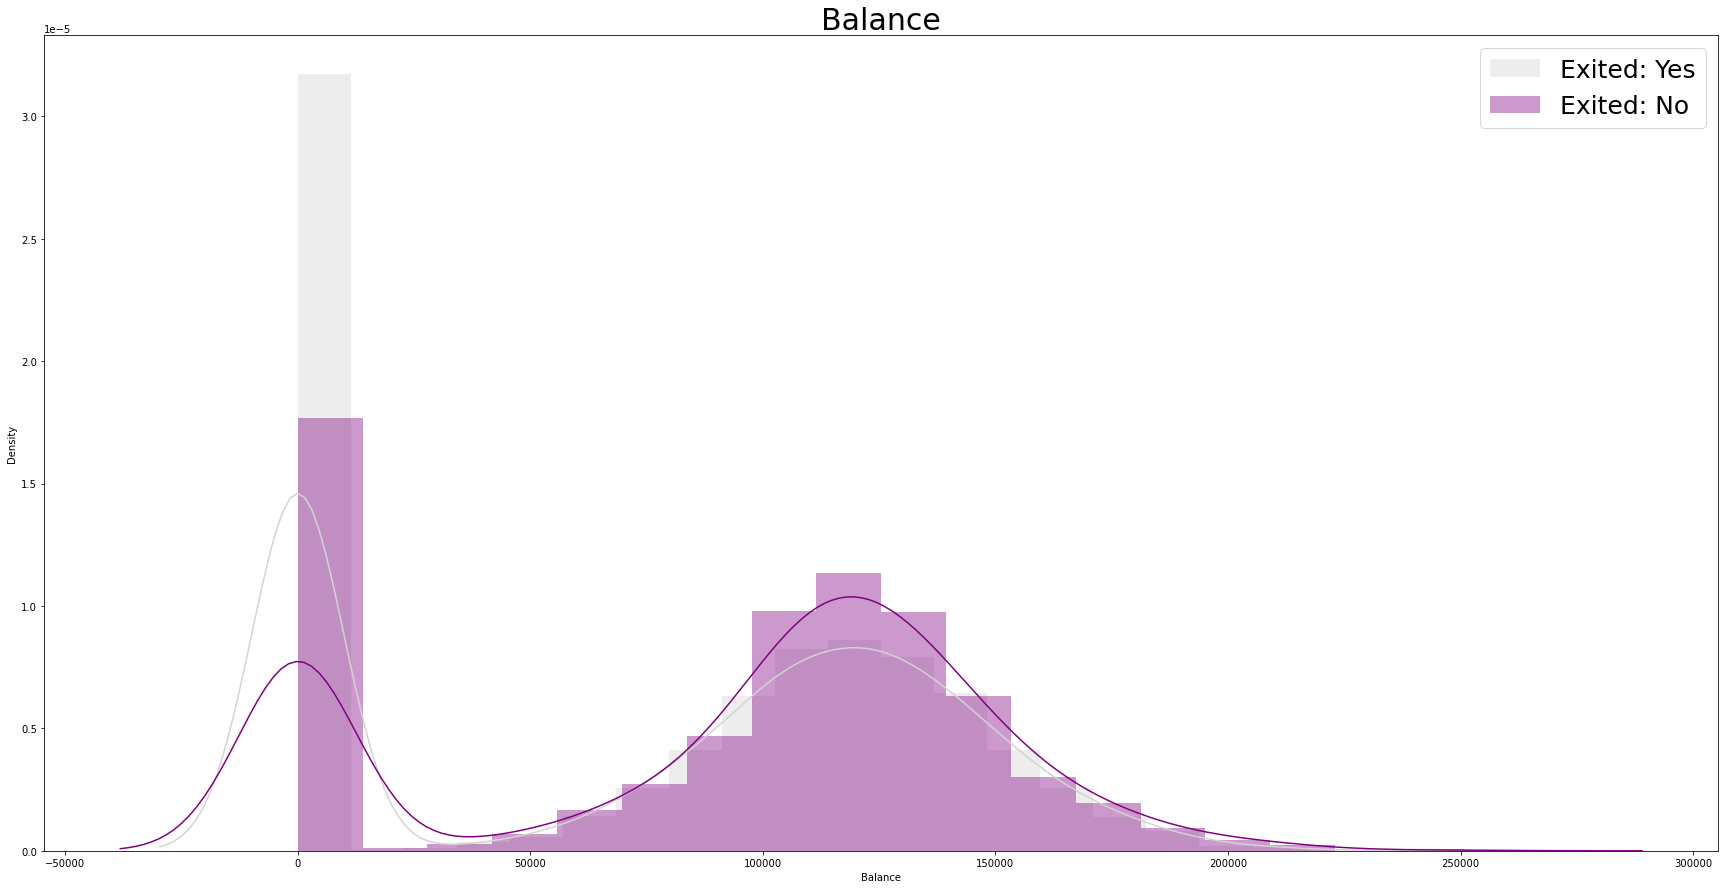

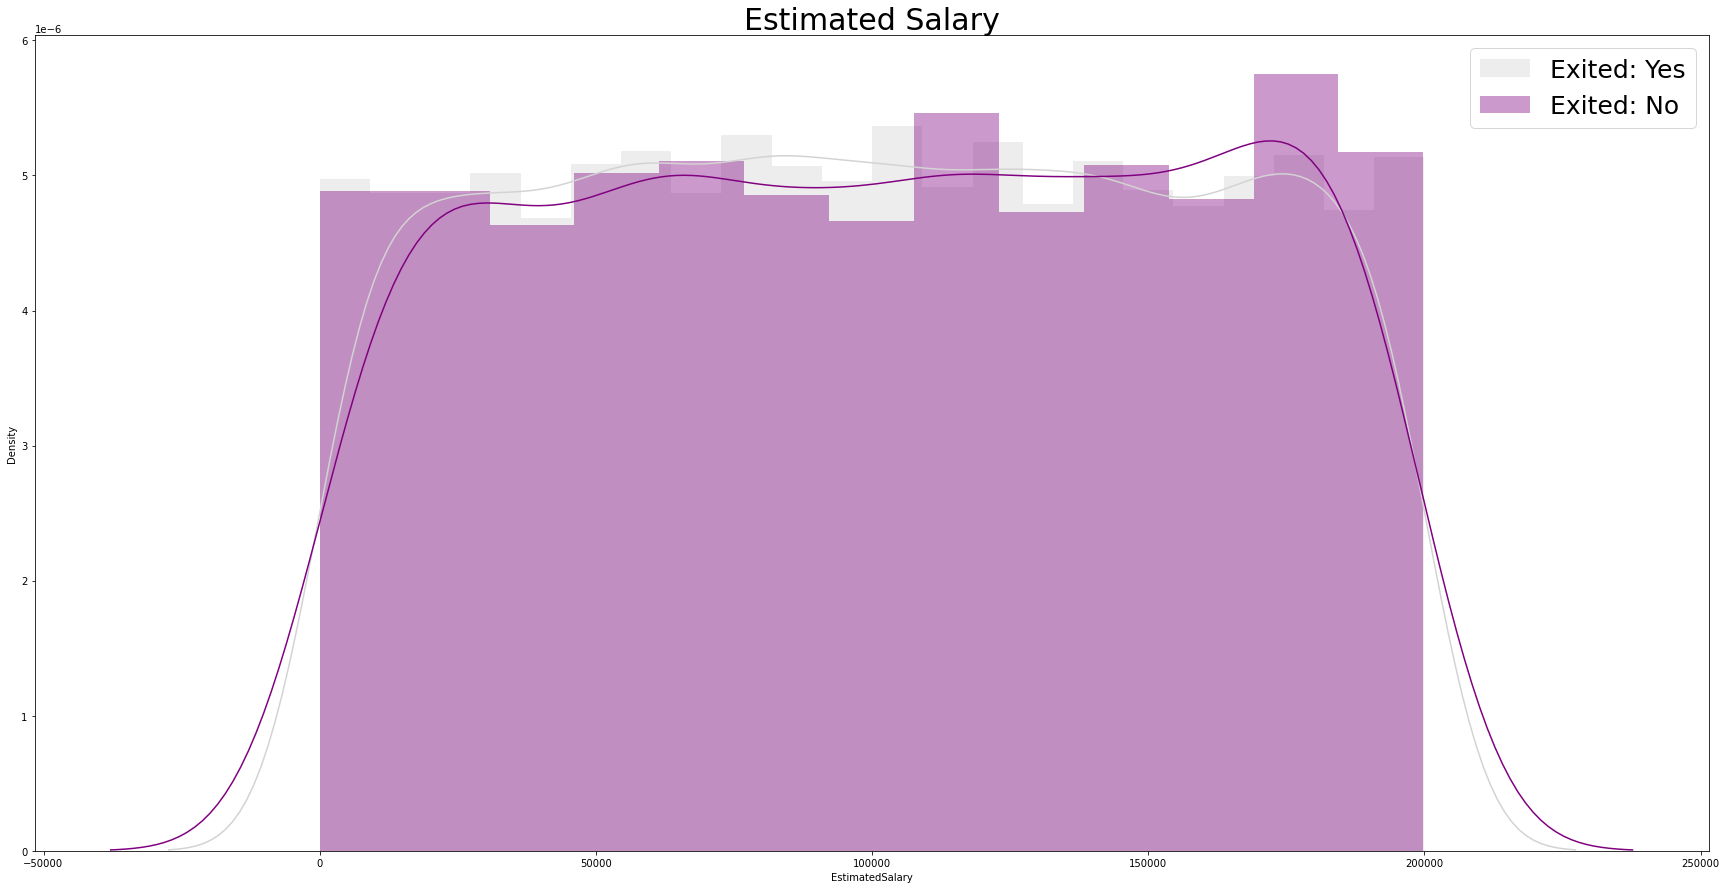

In [37]:
target_0 = data.loc[data['Exited'] == 0]
target_1 = data.loc[data['Exited'] == 1]



def hist(c,no_c,title):
    plt.figure(figsize=(30,15))
    plt.title(title,fontsize=30)


    m1=sns.distplot(c,label='Exited: Yes')
    m2=sns.distplot(no_c,label='Exited: No')
    plt.legend(fontsize=25)
        

hist(data['Tenure'],target_1['Tenure'],"Tenure")


hist(data['Balance'],target_1['Balance'],"Balance")

hist(data['EstimatedSalary'],target_1['EstimatedSalary'],"Estimated Salary")

    

plt.show()


#### Relations with 6 features: 'CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember' and the label.

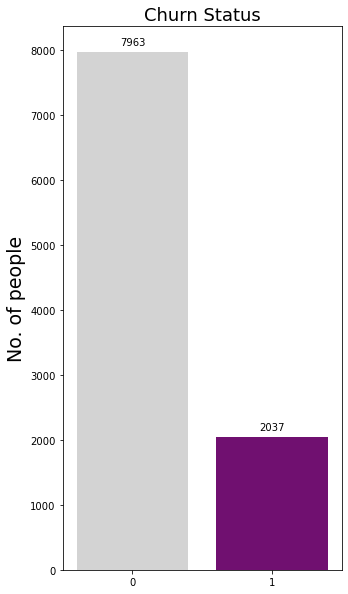

<Figure size 720x576 with 0 Axes>

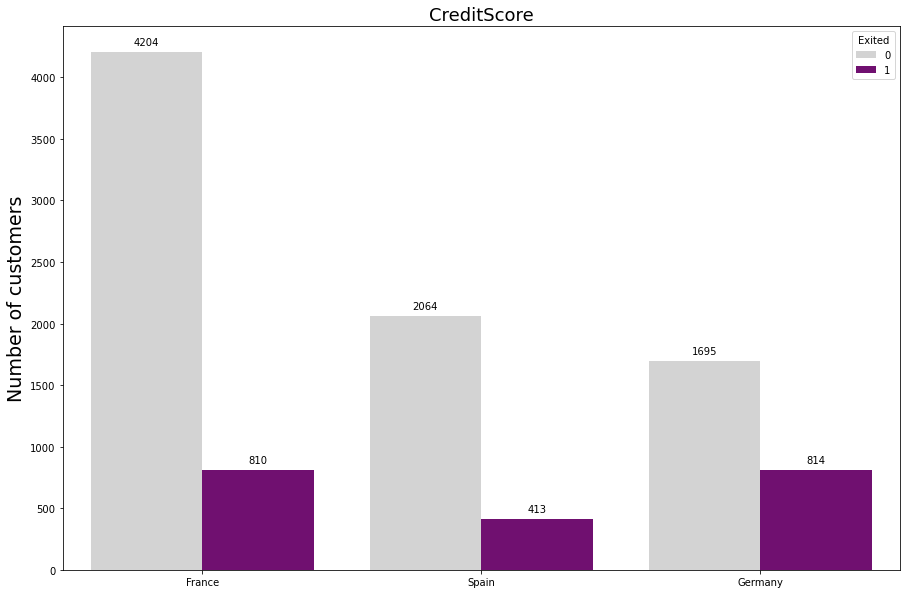

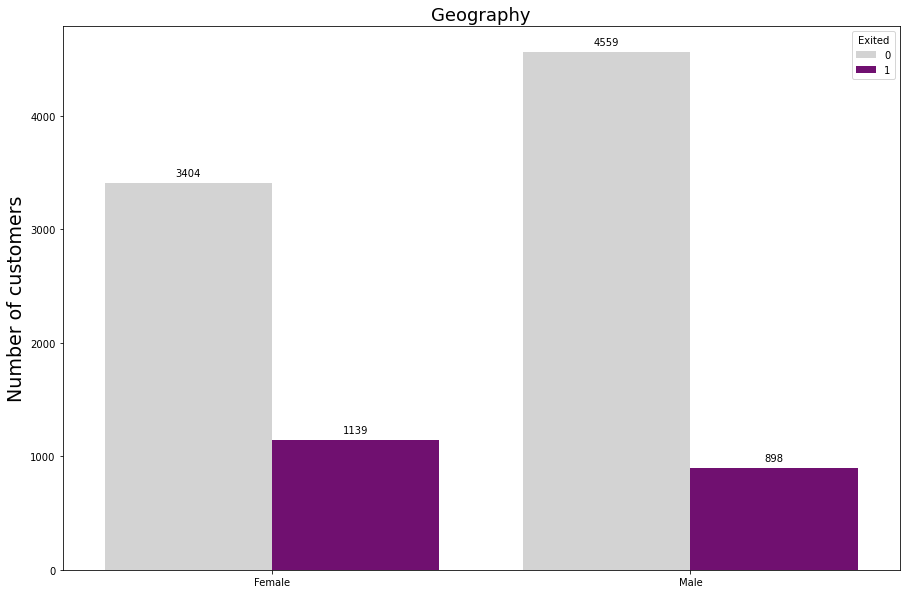

In [38]:
palette = ['lightgrey','purple']

#TOTAL CHURN 
sns.set_palette(palette)
plt.figure(figsize=(5,10))
plt.title("Churn Status",fontsize=18)
x=sns.countplot(x="Exited",data=data)
for z in x.patches:
    x.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.ylabel("No. of people",fontsize=19)
plt.xlabel("")

plt.figure(figsize=(10,8))
t1=data.loc[data['Exited']=='1']
t1 = t1.iloc[:,1:]


#ATTRITIONS OF DATA

values = ['CreditScore', 'Geography']

index=0
#telco_data["SeniorCitizen"] = telco_data["SeniorCitizen"].replace({1:"Yes",0:"No"})
for i in values:    
    if(index!=7): #I don't want a countplot of tenure
        plt.figure(figsize=(15,10))
        plt.title(values[index],fontsize=18)
        x=sns.countplot(x=data.keys()[index+1],data=data,hue="Exited")
        plt.ylabel("Number of customers",fontsize=19)
        plt.xlabel("")
        for z in x.patches:
                x.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                
        
        index=index+1
    else:
        index=index+1
        continue

        
    

plt.show()


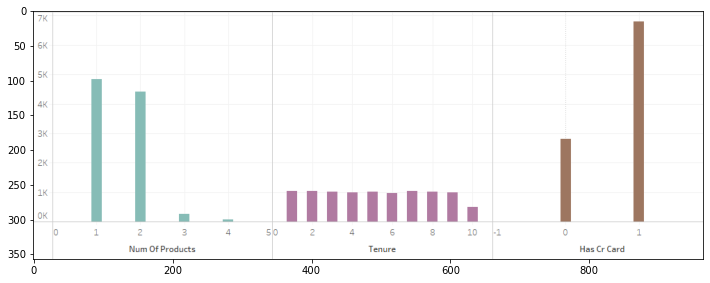

In [44]:
from matplotlib import image

img = image.imread(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Capture.png')

plt.figure(figsize=(12,20))
plt.imshow(img)

plt.show()

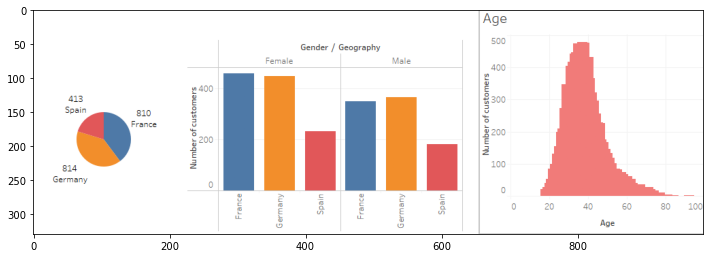

In [45]:
from matplotlib import image

img = image.imread(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Capture2.png')

plt.figure(figsize=(12,20))
plt.imshow(img)

plt.show()

#### Save the clean data before encoding in a separate file.

In [24]:
data.to_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\churn_clean.csv', index = False)

Comments: The data is highly imbalanced. We need it to be balanced later for the machine learning models so we are going to make it balanced with the undersampling method that is not working with categorical data so we need to Encode our data.


# Encoding

####  We use the LabelEncoder method to encode the columns: 'Geography' and 'Gender'.

In [25]:
lbl_ebcode = LabelEncoder()

data.Geography = lbl_ebcode.fit_transform(data.Geography)
data.Gender = lbl_ebcode.fit_transform(data.Gender)

In [26]:
# Print the first 5 rows of the encoded dataset
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [27]:
# Print the last 5 rows of the encoded dataset
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


#### Before changing the dataset, we must split the dataset into training and testing because the change is only for the training purpose.

In [28]:
# We define X and y
X= data.drop('Exited', axis=1)
y=data['Exited']


# We split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
random_state = 2, shuffle = True, stratify = y)

In [29]:
undersampler = ClusterCentroids()

In [30]:
X_res, y_res = undersampler.fit_resample(X_train, y_train)

In [31]:
# Check if our sample is balanced 
y_res.value_counts()


0    1365
1    1365
Name: Exited, dtype: int64

Comment: Our sample is balanced.

In [32]:
# We decide to balance all our dataset
undersampler = ClusterCentroids()
X_new, y_new = undersampler.fit_resample(X, y)
X_new["Target"]=y_new

# We create a new dataframe with balanced data
data_new=X_new

In [33]:
# We check if we really have balanced data
data_new['Target'].value_counts()


0    2037
1    2037
Name: Target, dtype: int64

Comment: Our new dataframe is balanced.

In [34]:
# We check the shape of our new dataframe
data_new.shape

(4074, 11)

Comment: We lost a lot of information, almost 50% of our dataset: 10000- 4074 = 5926 rows.

In [35]:
# Check if we have missing values
data_new.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Target             0
dtype: int64

Comment: There is no missing values.

In [36]:
# Check if we have any duplicate
data_new.duplicated().sum()

0

Comment: There is no duplicate.

#### **Outliers**

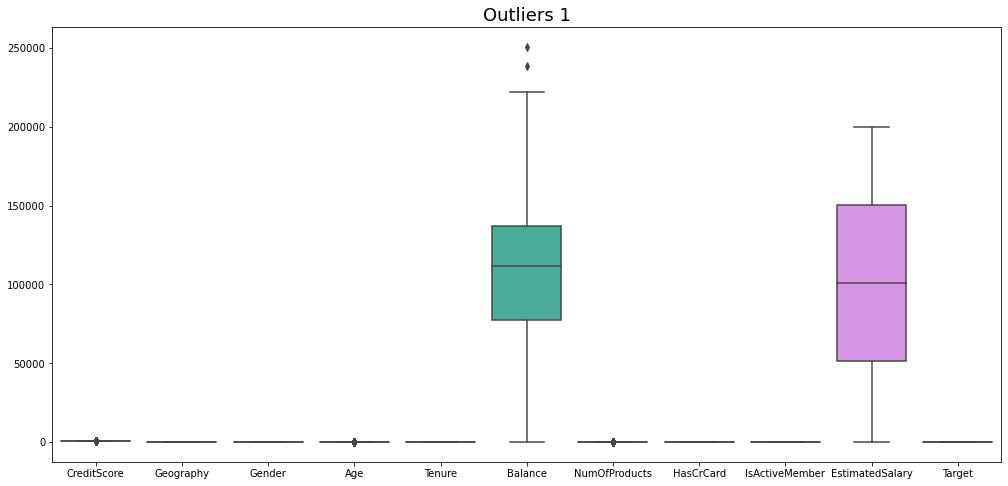

In [37]:
#Check if we have any outliers
f, ax = plt.subplots(figsize=(17, 8))
sns.boxplot(data=data_new)
plt.title('Outliers 1', fontsize = 18)
plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Outliers_1.png')

plt.show()



Comment: According to the plot above, We have 2 outliers.

In [38]:
# We can check the maximum of the column 'balance' to have the outliers
data_new.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
count,4074.000000,4074.000000,4074.00000,4074.000000,4074.000000,4.074000e+03,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,649.090574,0.637948,0.35837,41.073638,4.829897,1.005561e+05,1.304124,0.555719,0.315906,100707.756614,0.500000
std,85.469564,0.702312,0.47958,9.345693,2.535150,5.400141e+04,0.639211,0.496947,0.464933,57715.933721,0.500061
min,350.000000,0.000000,0.00000,18.000000,0.000000,-1.455192e-11,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,0.00000,35.000000,3.000000,7.755746e+04,1.000000,0.000000,0.000000,51475.850000,0.000000
50%,650.000000,1.000000,0.00000,40.000000,5.000000,1.119939e+05,1.000000,1.000000,0.000000,101203.546014,0.500000
75%,703.000000,1.000000,1.00000,47.000000,7.000000,1.371254e+05,1.000000,1.000000,1.000000,150313.508125,1.000000
max,850.000000,2.000000,1.00000,84.000000,10.000000,2.508981e+05,4.000000,1.000000,1.000000,199953.330000,1.000000


In [39]:
data_new = data_new[data_new.Balance != data_new['Balance'].max()]

In [40]:
data_new.shape

(4073, 11)

Comment: We deleted the first outliers so we have to repeat the action.

In [41]:
print('Maximum of Balance: ', data_new['Balance'].max())
data_new = data_new[data_new.Balance != data_new['Balance'].max()]
data_new.shape

Maximum of Balance:  238387.56


(4072, 11)

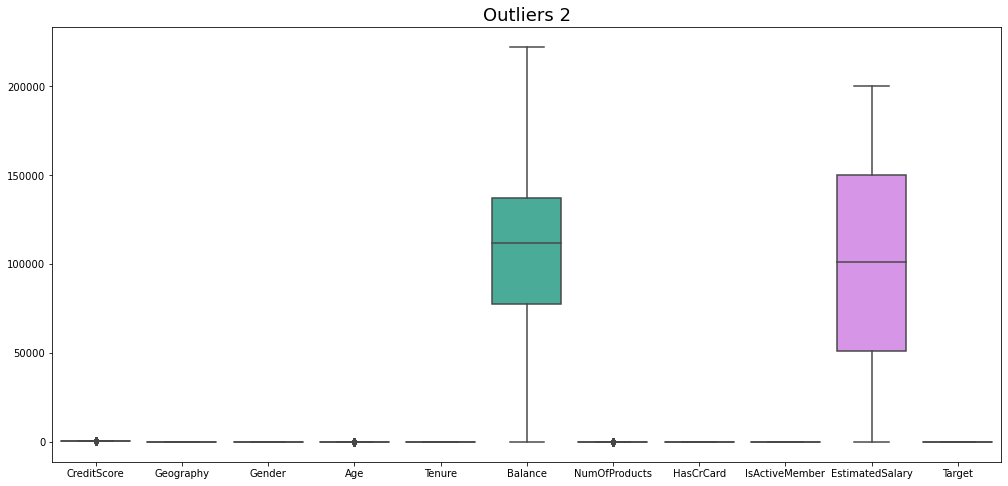

In [42]:
#Check if we still have any outliers
f, ax = plt.subplots(figsize=(17, 8))
sns.boxplot(data=data_new)
plt.title('Outliers 2', fontsize = 18)

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Outliers_2.png')
plt.show()


Comment: Our data is clean. Now we have a datafranme with 4072 rows and 11 columns.

# Correlation

#### Next, we evaluate if the columns in this dataset are strongly correlated with 2 steps:
1 - a correlation matrix using the numeric columns in the dataset.
2 - a heatmap using seaborn to visualize which columns have high collinearity.


In [43]:
#Correlation matrix
corr = data_new.corr()
corr 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
CreditScore,1.000000,-0.002818,-0.012030,-0.023793,0.019715,0.017083,-0.001486,-0.018589,0.002526,-0.030089,-0.043594
Geography,-0.002818,1.000000,0.097392,0.082631,-0.009049,0.066047,0.097534,0.117644,0.083151,-0.008483,0.237979
Gender,-0.012030,0.097392,1.000000,0.093578,0.014923,0.047304,0.044729,0.138959,0.088805,-0.004365,0.171939
Age,-0.023793,0.082631,0.093578,1.000000,0.005283,-0.086933,0.110030,0.110690,0.094133,0.000107,0.402750
Tenure,0.019715,-0.009049,0.014923,0.005283,1.000000,0.017548,0.030834,0.036474,-0.012209,0.024831,0.040943
Balance,0.017083,0.066047,0.047304,-0.086933,0.017548,1.000000,-0.049042,0.020389,0.025826,-0.008110,-0.176635
NumOfProducts,-0.001486,0.097534,0.044729,0.110030,0.030834,-0.049042,1.000000,0.111617,0.109735,0.029220,0.267452
HasCrCard,-0.018589,0.117644,0.138959,0.110690,0.036474,0.020389,0.111617,1.000000,0.077159,-0.022880,0.289202
IsActiveMember,0.002526,0.083151,0.088805,0.094133,-0.012209,0.025826,0.109735,0.077159,1.000000,-0.012170,0.095978
EstimatedSalary,-0.030089,-0.008483,-0.004365,0.000107,0.024831,-0.008110,0.029220,-0.022880,-0.012170,1.000000,0.013021


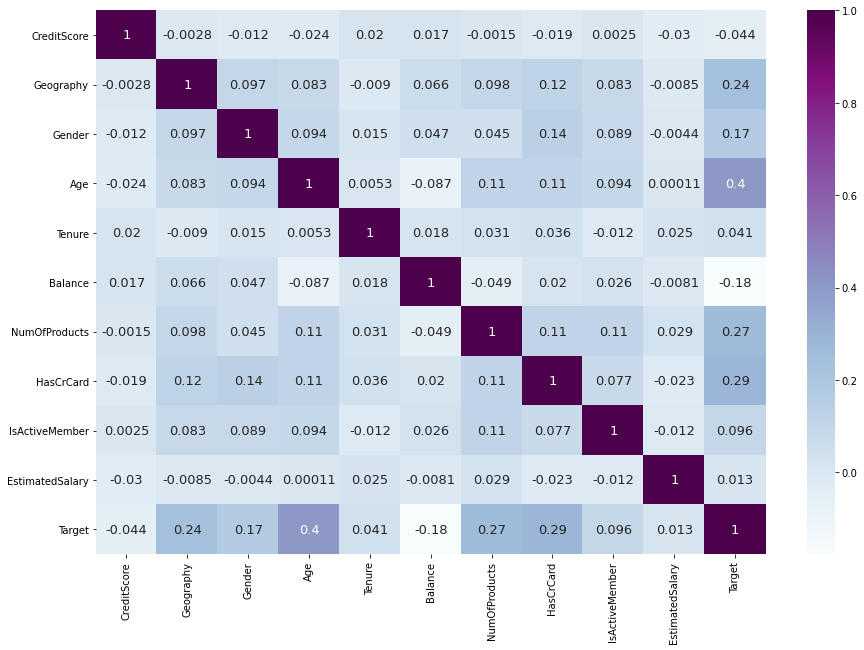

In [44]:
# Heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, annot_kws={"size":13}, cmap="BuPu")

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Correlation_matrix.png')

plt.show()



Comment: There is a correlation between Age, Balance and Exited but they are not really strong.

#### Scatter Matrix is another way to find relations or correlations between variables in a dataset effectively. 

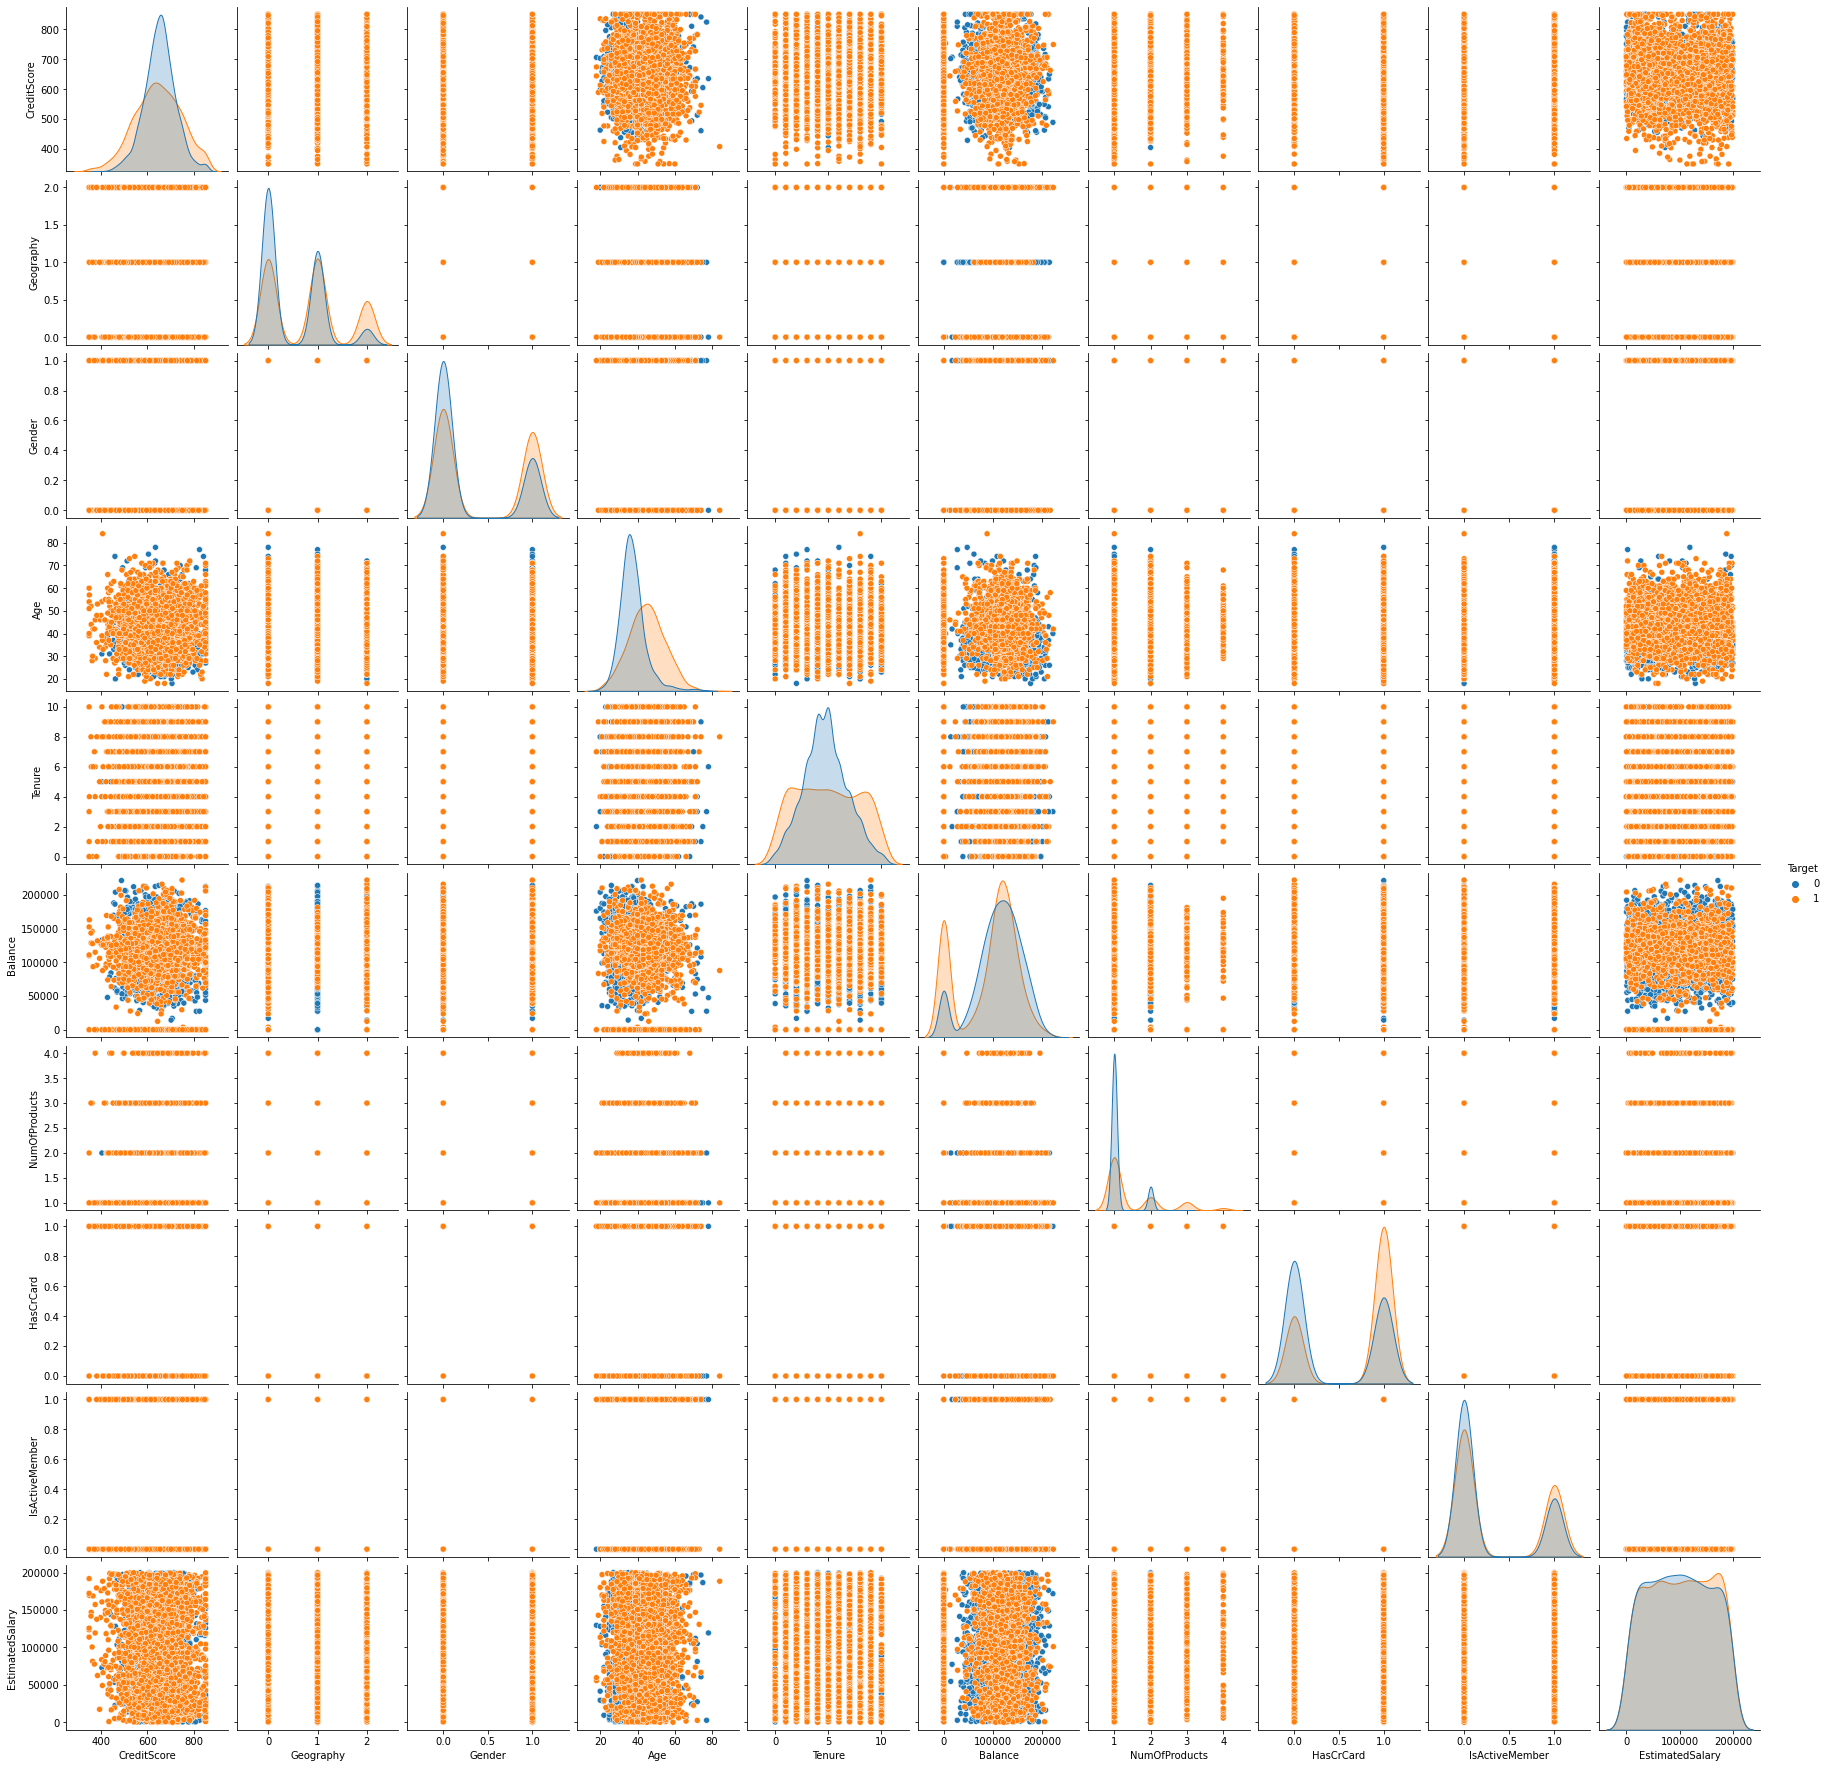

In [45]:
# 4. Scatter Matrix
import seaborn as sb 
sb.pairplot(data = data_new, hue = 'Target')

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Scatter_matrix.png')
plt.show()

#### Save the encoded dataset.

In [46]:
data_new.to_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\churn_encoded.csv',  index = False)